## Sentiment analysis of YELP reviews dataset


In [66]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import gzip
import datetime
import plotly as px

In [81]:
def configure_plotly_browser_state(): #function to allows ploty to show interactive plots in colab
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [2]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [3]:
data = pd.read_csv('/gdrive/MyDrive/reviews_yelp_nn.csv.gz', compression='gzip', sep="\t", error_bad_lines=False, quotechar = '"') 
#https://www.kaggle.com/yelp-dataset/yelp-dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.



### Data Exploration

In [5]:
data.shape

(3342958, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342958 entries, 0 to 3342957
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   business_id  object 
 1   cool         object 
 2   date         object 
 3   funny        float64
 4   review_id    object 
 5   stars        float64
 6   text         object 
 7   useful       float64
 8   user_id      object 
dtypes: float64(3), object(6)
memory usage: 229.5+ MB


In [7]:
data["stars"].value_counts()

5.0    1467219
4.0     733911
1.0     501156
3.0     369404
2.0     271259
Name: stars, dtype: int64

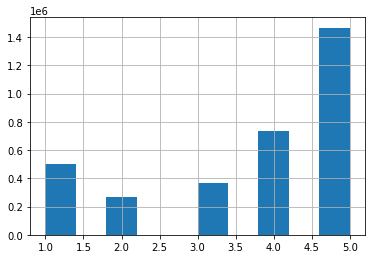

In [8]:
data["stars"].hist()

In [9]:
data['text_str'] = data['text'].apply(str)
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_str
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.0,uJRdHLz4XNmDK5pOkWbZNA,5.0,"Best Dim Sum in the city, their cart service i...",0.0,POETn3fQcZ8ngLAARCATSg,"Best Dim Sum in the city, their cart service i..."
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.0,TlPh8jy8bt_TSGfjEw-pvA,5.0,How... HOW did I not head down here sooner? Fo...,7.0,oUK6Xs5dPPnP4whFeZExGg,How... HOW did I not head down here sooner? Fo...
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.0,GmoBAVE1pTo0kjmeKrXmLQ,4.0,Carnitas were wonderful. First time there and ...,0.0,SiaSUNlKQK7f57WBPmyyNw,Carnitas were wonderful. First time there and ...
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.0,ZHuM9P81zfuNuFZ5ThXNRg,5.0,Great staff who are always willing to help. I ...,0.0,PsH5Qi8R69WAlhNv8mXWRA,Great staff who are always willing to help. I ...
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.0,-2Ce00mfWYP20yt7k6kARg,3.0,"This place is bigger, brighter, new so it's cl...",3.0,r-zUIQPaHzvIyL93wQaoiQ,"This place is bigger, brighter, new so it's cl..."


#### Review length

In [11]:
data['text_len'] = data['text_str'].apply(len)
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_str,text_len
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.0,uJRdHLz4XNmDK5pOkWbZNA,5.0,"Best Dim Sum in the city, their cart service i...",0.0,POETn3fQcZ8ngLAARCATSg,"Best Dim Sum in the city, their cart service i...",281
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.0,TlPh8jy8bt_TSGfjEw-pvA,5.0,How... HOW did I not head down here sooner? Fo...,7.0,oUK6Xs5dPPnP4whFeZExGg,How... HOW did I not head down here sooner? Fo...,1546
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.0,GmoBAVE1pTo0kjmeKrXmLQ,4.0,Carnitas were wonderful. First time there and ...,0.0,SiaSUNlKQK7f57WBPmyyNw,Carnitas were wonderful. First time there and ...,206
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.0,ZHuM9P81zfuNuFZ5ThXNRg,5.0,Great staff who are always willing to help. I ...,0.0,PsH5Qi8R69WAlhNv8mXWRA,Great staff who are always willing to help. I ...,275
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.0,-2Ce00mfWYP20yt7k6kARg,3.0,"This place is bigger, brighter, new so it's cl...",3.0,r-zUIQPaHzvIyL93wQaoiQ,"This place is bigger, brighter, new so it's cl...",289


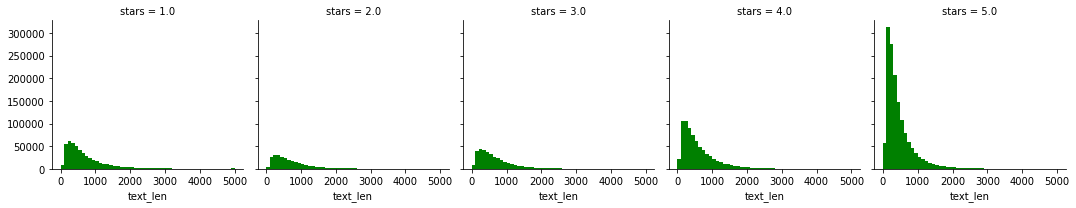

In [12]:
graph1 = sns.FacetGrid(data=data, col='stars')
graph1.map(plt.hist, 'text_len', color = 'green', bins = 50)

No handles with labels found to put in legend.


Text(0, 0.5, 'Review length')

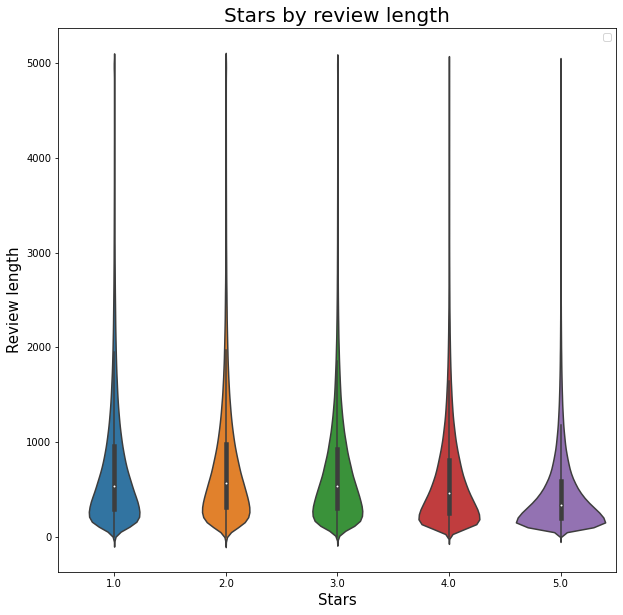

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax=sns.violinplot(y='text_len',x='stars',data= data)
plt.legend()
ax.set_title('Stars by review length',fontsize=20)
ax.set_xlabel('Stars',fontsize=15)
ax.set_ylabel('Review length',fontsize=15)

Generally, the length of the reviews is inversely proportional to the number of stars

#### Reviews by date


In [15]:
data["date"] = data["date"].str.extract(r"(\d{4})")

In [16]:
pd.to_numeric(data['date'])

0          2016.0
1          2013.0
2          2016.0
3          2016.0
4          2012.0
            ...  
3342953    2016.0
3342954    2017.0
3342955    2016.0
3342956    2014.0
3342957    2018.0
Name: date, Length: 3342958, dtype: float64

In [17]:
pd.to_numeric(data['date'])

0          2016.0
1          2013.0
2          2016.0
3          2016.0
4          2012.0
            ...  
3342953    2016.0
3342954    2017.0
3342955    2016.0
3342956    2014.0
3342957    2018.0
Name: date, Length: 3342958, dtype: float64

Text(0, 0.5, 'N° of Reviews')

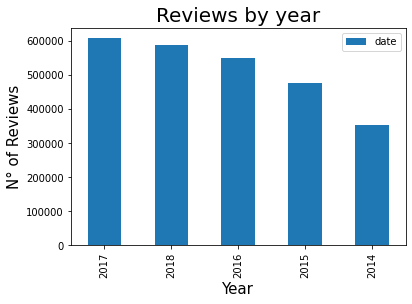

In [18]:
ax=data["date"].value_counts()[:5].plot(kind="bar")
plt.legend()
ax.set_title('Reviews by year',fontsize=20)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('N° of Reviews',fontsize=15)

#### Review Tags

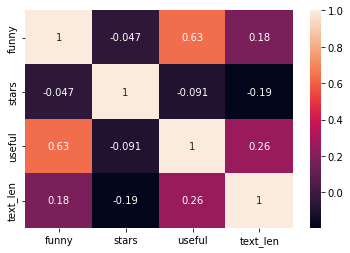

In [ ]:
sns.heatmap(data = data.corr(), annot = True)


Loooking at the correlation, it's verified that the longer comments are more tagged as useful and fun

#### Nulls

In [19]:
data.isnull().sum()

business_id     0
cool            3
date            9
funny           9
review_id       9
stars           9
text           10
useful         14
user_id        14
text_str        0
text_len        0
dtype: int64

In [20]:
data.dropna()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_str,text_len
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016,0.0,uJRdHLz4XNmDK5pOkWbZNA,5.0,"Best Dim Sum in the city, their cart service i...",0.0,POETn3fQcZ8ngLAARCATSg,"Best Dim Sum in the city, their cart service i...",281
1,VPcFNI-6HICR5SJM--KjNA,5,2013,2.0,TlPh8jy8bt_TSGfjEw-pvA,5.0,How... HOW did I not head down here sooner? Fo...,7.0,oUK6Xs5dPPnP4whFeZExGg,How... HOW did I not head down here sooner? Fo...,1546
2,ugdUuApH3pYXggW5qpbALg,0,2016,0.0,GmoBAVE1pTo0kjmeKrXmLQ,4.0,Carnitas were wonderful. First time there and ...,0.0,SiaSUNlKQK7f57WBPmyyNw,Carnitas were wonderful. First time there and ...,206
3,3fCxmmg8nHGaE5upJWQUrw,0,2016,0.0,ZHuM9P81zfuNuFZ5ThXNRg,5.0,Great staff who are always willing to help. I ...,0.0,PsH5Qi8R69WAlhNv8mXWRA,Great staff who are always willing to help. I ...,275
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012,0.0,-2Ce00mfWYP20yt7k6kARg,3.0,"This place is bigger, brighter, new so it's cl...",3.0,r-zUIQPaHzvIyL93wQaoiQ,"This place is bigger, brighter, new so it's cl...",289
...,...,...,...,...,...,...,...,...,...,...,...
3342953,oryS4vX0xkKC4tOekgowDQ,0,2016,0.0,pBNcMg-KVzZG-xDu9cgLww,2.0,Slow service to seat and then to serve. Left w...,0.0,srjcYNoIOXJ57VP8z7gwmQ,Slow service to seat and then to serve. Left w...,124
3342954,na4Th5DrNauOv-c43QQFvA,4,2017,2.0,xNG2SzEHJi7w7LbJDF7Oog,4.0,I stayed at the Bellagio for 3 nights this mon...,12.0,uCNgCZCuo07ew0sWPB1z7g,I stayed at the Bellagio for 3 nights this mon...,2121
3342955,Lg238Ittk3KO3lqHyBAcYA,1,2016,1.0,RCNXjfRdRZ2exHihiy-oqw,5.0,1: book an appointment! You get to walk past ...,1.0,v1w2A6kHRiI1OD4DyXOiDQ,1: book an appointment! You get to walk past ...,292
3342956,NxeEdKkvbZmuuBar_1NFrg,1,2014,2.0,g0mcjOV3o3-dPzpKiRecDg,1.0,"This review is based on quality of pricing, no...",13.0,j-i6_zboeko9mkR9UIFKMw,"This review is based on quality of pricing, no...",1775


### Preprocessing

#### 5% of the dataset will be used (167,148 entries)

```
```



In [21]:
data5=data.sample(frac=0.05,random_state=2021) 

In [22]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167148 entries, 302591 to 1485737
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   business_id  167148 non-null  object 
 1   cool         167147 non-null  object 
 2   date         167147 non-null  object 
 3   funny        167147 non-null  float64
 4   review_id    167147 non-null  object 
 5   stars        167147 non-null  float64
 6   text         167147 non-null  object 
 7   useful       167147 non-null  float64
 8   user_id      167147 non-null  object 
 9   text_str     167148 non-null  object 
 10  text_len     167148 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 15.3+ MB


Langdetect library to work only with reviews in english

In [23]:
!pip install langdetect

     |████████████████████████████████| 981 kB 11.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=166e286c925295a2a85dfbfdfd1b93c13adf8ec5e44ae20d1a876850c4ef8932
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [24]:
data5=data5[data5["text_len"]>10]

In [25]:
from langdetect import detect

In [26]:
def review_language(row):
    try:
        language = detect(row)
    except:
        language = "error"
        
    return language
data5["language"] = data5.text.apply(review_language)

In [27]:
data5["language"].value_counts()

en       166286
fr          642
es           81
de           32
it           19
zh-cn        19
ja           12
pt            7
ko            7
da            6
nl            5
zh-tw         5
af            4
no            3
so            2
ro            2
et            1
sv            1
cs            1
ca            1
Name: language, dtype: int64

99% of reviews are in english. 

In [28]:
data5=data5[data5["language"]=="en"]


In [29]:
data5["language"].value_counts()

en    166286
Name: language, dtype: int64

## Guardamos el database ya preprocesado con el que trabajaremos a continuación:





In [30]:
data5.to_csv('/gdrive/My Drive/tp5.csv')

In [31]:
df=pd.read_csv("/gdrive/My Drive/tp5.csv")
df.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_str,text_len,language
0,302591,2FfZUyA82YhQCjWNiqDCzQ,5.0,2010,7.0,TxPMQpEHBZyFwXtlyVnNBw,3.0,Solidly mediocre. My first time there was a bu...,7.0,iL_CR-WQnveqrff9LecqAQ,Solidly mediocre. My first time there was a bu...,378,en
1,297659,mw6g4_dXp-FISBujPUuDLw,1.0,2011,0.0,r1FCntFHTxOwHKPDfE1vzg,5.0,STEVE is the BEST bartender alive!! This guy i...,1.0,6n5JvhRD403_-rFQob_Vyw,STEVE is the BEST bartender alive!! This guy i...,360,en
2,226863,_V0yJdpXrbdKzBDoVSJGWA,0.0,2016,0.0,1rxwBWFOP4-cXBVjQsyZQQ,3.0,decent price for buffet but not the biggest se...,0.0,zcCEjj_IjSBkLq1UPLizww,decent price for buffet but not the biggest se...,224,en
3,1042045,pHVAwDav8SW1eS97LbvCtw,1.0,2010,2.0,B19iIWf5bcF5jPMP85Lhbw,5.0,"Shazan is the BEST! \nAlways delicious, beauti...",1.0,97zYn4v5HLJWVq97uVJh9g,"Shazan is the BEST! \nAlways delicious, beauti...",328,en
4,1925553,_mg5bYknpZgaWSfjQVmrJQ,0.0,2015,0.0,Su6-XCQgMdCJPG02TqXEeg,5.0,I don't understand the 3 1/2 stars. This place...,0.0,LoMuGGTp5OeT37vTyYWpPQ,I don't understand the 3 1/2 stars. This place...,218,en


In [32]:
print(df.shape)

(166286, 13)


### To build a binomial clasiffication model, the 3-stars reviews will be dispensed; with the 4-5 stars range as positive review and 1-2 as negative.


In [54]:
def pos_neg(x):
  if x>3:
    return 1 #1 for positive reviews
  else:
    return 0 #0 for negative reviews
       

In [55]:

df_class = df[(df['stars']!=3)]
df_class['sentimiento']=df_class['stars'].apply(pos_neg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df_class


,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_str,text_len,language,sentimiento
1,297659,mw6g4_dXp-FISBujPUuDLw,1.0,2011,0.0,r1FCntFHTxOwHKPDfE1vzg,5.0,STEVE is the BEST bartender alive!! This guy i...,1.0,6n5JvhRD403_-rFQob_Vyw,STEVE is the BEST bartender alive!! This guy i...,360,en,1
3,1042045,pHVAwDav8SW1eS97LbvCtw,1.0,2010,2.0,B19iIWf5bcF5jPMP85Lhbw,5.0,"Shazan is the BEST! \nAlways delicious, beauti...",1.0,97zYn4v5HLJWVq97uVJh9g,"Shazan is the BEST! \nAlways delicious, beauti...",328,en,1
4,1925553,_mg5bYknpZgaWSfjQVmrJQ,0.0,2015,0.0,Su6-XCQgMdCJPG02TqXEeg,5.0,I don't understand the 3 1/2 stars. This place...,0.0,LoMuGGTp5OeT37vTyYWpPQ,I don't understand the 3 1/2 stars. This place...,218,en,1
5,781225,-faYl3ejjjm7ciR_j1ke7A,0.0,2012,0.0,RjSnyRAqZjB1gGGl30D2IQ,4.0,What can you say about Red Lobster. It has be...,0.0,x58Yw-LvdZ2Ajm1tT7zL8g,What can you say about Red Lobster. It has be...,634,en,1
6,505467,ttsLdrsKe24vXZcmZXcZ4g,0.0,2016,0.0,hkikOe0tr-dUaXmDptNVSg,4.0,The service here at this location was great!!!...,0.0,7VKQ6K2-9GTj1CkhllXP-Q,The service here at this location was great!!!...,314,en,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166280,2507003,OJGJLT36dXWB_rOXK2aj-A,0.0,2016,0.0,ZH7nhrj0oLKZjDKu0UZLnw,4.0,A front tootk with veneer broke Sunday night m...,0.0,6z1qfUBgYCK2L1S6KtMjuA,A front tootk with veneer broke Sunday night m...,321,en,1
166282,2647303,qhlEzXyOfph858J9dw32LA,0.0,2018,0.0,nalD33MQeYCrVbxcagmpqQ,1.0,they are always late with my stuff and it is a...,2.0,c3w_qhYZHKsdAfrJQtyBqQ,they are always late with my stuff and it is a...,226,en,0
166283,988060,xxOHJFjVsrhMsJxtbCq2Dw,0.0,2016,0.0,KoKLs4sfEllEOyaR3VL-nA,5.0,"Great bread, tasty baked goods, plus a nice se...",0.0,Ov7OsCOFAAap3J8jfBL17A,"Great bread, tasty baked goods, plus a nice se...",420,en,1
166284,2387401,uHGM_RXqIzjHfc1QxhJrrQ,3.0,2015,0.0,IL6YVmrR7jiZu63Bk8riuA,5.0,Went to Mor to check out a sectional. Normally...,4.0,9KkNCUgrB4iQfs68xEHmtA,Went to Mor to check out a sectional. Normally...,347,en,1


Text(0, 0.5, 'N° of Reviews')

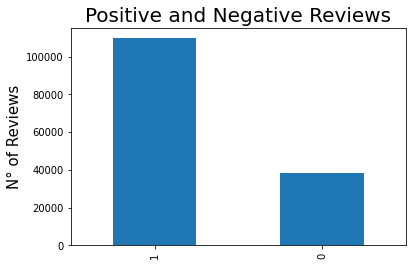

In [57]:
ax=df_class["sentimiento"].value_counts().plot(kind="bar")

ax.set_title('Positive and Negative Reviews',fontsize=20)

ax.set_ylabel('N° of Reviews',fontsize=15)

### Text cleaning

In [37]:
import re
#Data cleaning by removing stop words and puntuation


def to_lowercase(words):
    """Standardize to lower case"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation characters"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words



def str_join(text):
    """join the characters that the preprocessing separated into a list"""
    sent_str = ""
    for i in text:
        sent_str += str(i) 
    return sent_str

def text_process(text):
    text = to_lowercase(text)
    text = remove_punctuation(text)
    text = str_join(text)
    return text
    

In [40]:
x_pos = df_class[df_class['sentimiento']==1]['text']
x_neg = df_class[df_class['sentimiento']==0]['text']

In [41]:
x = df_class['text'].apply(text_process)

In [42]:
x.shape

(148007,)

In [43]:
x_neg = x_neg.apply(text_process)

In [44]:
x_pos = x_pos.apply(text_process)

In [58]:
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

In [59]:
nltk.download('stopwords') #load stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Vectorization

In [60]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( ngram_range=(1,2),stop_words = "english").fit(x)
print(len(vectorizer.vocabulary_))

3214839


In [46]:
x_vect = vectorizer.transform(x)

In [61]:

print('Shape of Sparse Matrix: ', x_vect.shape)
print('Amount of Non-Zero occurrences: ', x_vect.nnz)

Shape of Sparse Matrix:  (148007, 3214839)
Amount of Non-Zero occurrences:  13180799


In [62]:
x_pos_vect = vectorizer.transform(x_pos) #Vectorize positive reviwes for analysis
x_neg_vect = vectorizer.transform(x_neg) #Vectorize negative reviwes for analysis

#### Words frequency in positive reviews

In [49]:
freq_pos = x_pos_vect.sum(axis=0)
df_freq_pos = pd.DataFrame(freq_pos).transpose().rename(columns={0:"frecuencia"})
vocab = [j for j, v in sorted(vectorizer.vocabulary_.items(),key=lambda item:item[1])]
df_freq_pos['word'] = vocab

In [50]:
df_freq_pos.sort_values(by='frecuencia',ascending=False).head(40)

,frecuencia,word
1233807,60051,great
1206598,52652,good
2094163,52342,place
1098032,49164,food
2499757,35248,service
2867486,33883,time
1599123,32087,like
1500580,29840,just
2259725,26636,really
288167,23905,best


#### Words frequency in negative reviews

In [51]:
freq_neg = x_neg_vect.sum(axis=0)
df_freq_neg = pd.DataFrame(freq_neg).transpose().rename(columns={0:"frecuencia"})
vocab = [j for j, v in sorted(vectorizer.vocabulary_.items(),key=lambda item:item[1])]
df_freq_neg['word'] = vocab

In [52]:
df_freq_neg.sort_values(by='frecuencia',ascending=False).head(40)

,frecuencia,word
1098032,21512,food
1500580,19599,just
2094163,18052,place
2499757,17830,service
2867486,17443,time
1599123,17439,like
1206598,14209,good
849414,12689,dont
2402192,12319,said
793919,11576,didnt




#### Bigrams frequency in positive reviews

In [64]:
vec = CountVectorizer(ngram_range=(2, 2),stop_words="english").fit(x)
def get_top_n_bigram(vec, text, n=None):
    
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(vec,x_pos, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False)


highly recommend 5995
customer service 4242
really good 3856
great service 3659
great place 3240
love place 3211
great food 3161
las vegas 3143
staff friendly 3023
service great 2934
ice cream 2916
food great 2719
make sure 2690
food good 2550
pretty good 2347
happy hour 2272
good food 2234
definitely recommend 1991
feel like 1935
friendly staff 1822


ReviewText
highly recommend        5995
customer service        4242
really good             3856
great service           3659
great place             3240
love place              3211
great food              3161
las vegas               3143
staff friendly          3023
service great           2934
ice cream               2916
food great              2719
make sure               2690
food good               2550
pretty good             2347
happy hour              2272
good food               2234
definitely recommend    1991
feel like               1935
friendly staff          1822
Name: count, dtype: int64

In [84]:
configure_plotly_browser_state() #need to call to see the output plot in Colab Notebook
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in positive reviews')


#### Frecuencia de bigramas en reviews negativas


In [86]:
common_words = get_top_n_bigram(vec,x_neg, 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False)

customer service 4243
dont know 1480
10 minutes 1219
20 minutes 1051
15 minutes 1038
tasted like 1036
30 minutes 967
food good 912
im sure 854
looked like 817
dont think 814
las vegas 805
didnt want 801
minutes later 798
make sure 791
feel like 716
waste time 701
credit card 676
long time 657
stay away 649


ReviewText
customer service    4243
dont know           1480
10 minutes          1219
20 minutes          1051
15 minutes          1038
tasted like         1036
30 minutes           967
food good            912
im sure              854
looked like          817
dont think           814
las vegas            805
didnt want           801
minutes later        798
make sure            791
feel like            716
waste time           701
credit card          676
long time            657
stay away            649
Name: count, dtype: int64

In [87]:
configure_plotly_browser_state() #need to call to see the output plot in Colab Notebook
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 in negative reviews')

It's observed that when the user refers to the time spent, it's with a negative connotation for the review


## Modeling


3 models will be tested with vectorization in monograms:
### - Naive Bayes
### - Logistic Regression
### - K- Neigbhors


In [88]:
y = df_class['sentimiento']

In [89]:
#Splitting the dataset into training data and test data in the proportion of 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_vect,y,test_size=0.2,random_state=101)

In [90]:
#undersampling to balance the classes
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5)



In [91]:
x_under, y_under = undersample.fit_resample(x_train, y_train)

### Naive Bayes

In [92]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_under, y_under)

nb_predict = nb.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, nb_predict))

print('\n')

print(classification_report(y_test, nb_predict))

[[ 6209  1426]
 [  973 20994]]


              precision    recall  f1-score   support

           0       0.86      0.81      0.84      7635
           1       0.94      0.96      0.95     21967

    accuracy                           0.92     29602
   macro avg       0.90      0.88      0.89     29602
weighted avg       0.92      0.92      0.92     29602



### K Neighbors

In [93]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_under, y_under)

knn_predict = knn.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, knn_predict))

print('\n')

print(classification_report(y_test, knn_predict)) 

[[ 3388  4247]
 [ 3943 18024]]


              precision    recall  f1-score   support

           0       0.46      0.44      0.45      7635
           1       0.81      0.82      0.81     21967

    accuracy                           0.72     29602
   macro avg       0.64      0.63      0.63     29602
weighted avg       0.72      0.72      0.72     29602



### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


model = LogisticRegression(solver = 'lbfgs', 
                            penalty = 'l2', 
                            C=1,
                           max_iter= 300)
model.fit(x_under, y_under)
print ("Final Accuracy: %s, F1-score: %s" 
           % (accuracy_score(y_test, model.predict(x_test)), f1_score(y_test, model.predict(x_test))))

Final Accuracy: 0.95196270522262, F1-score: 0.9676406335335881


In [96]:
#The frequency of the best predicted words as positive and the worst predicted as negative
feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(), model.coef_[0]
    )
}
print("Best Positive")
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:15]:
    print (best_positive)

print("Worst Negative")

for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:15]:
    print (best_negative)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Best Positive
('delicious', 2.9456942714706176)
('wont disappointed', 2.8835450553934097)
('amazing', 2.5672054980286916)
('excellent', 2.5597078403223636)
('awesome', 2.2767534628525397)
('fantastic', 2.2445929880295172)
('perfect', 1.9417502735114853)
('notch', 1.8599379357718093)
('loved', 1.7995960687325572)
('best', 1.7875811257756955)
('incredible', 1.7333019211841532)
('highly recommend', 1.7110476167718822)
('thank', 1.6484453107251258)
('wonderful', 1.6402706185266662)
('love', 1.623765845534401)
Worst Negative
('worst', -3.41414315397543)
('disappointing', -2.933281207399518)
('mediocre', -2.912109130071579)
('terrible', -2.685824489162673)
('horrible', -2.600027489553512)
('rude', -2.4948020725565554)
('bland', -2.470465298600979)
('overpriced', -2.3156628872339557)
('awful', -2.2276332053675283)
('disgusting', -2.1407895474899044)
('worse', -2.0370723818862473)
('meh', -1.9822275574111783)
('sucks', -1.9250071625494403)
('tasteless', -1.9021113010255761)
('dirty', -1.824572

### ROC CURVE

In [97]:
modelos = [MultinomialNB(),KNeighborsClassifier(),LogisticRegression(solver = 'lbfgs', 
                            penalty = 'l2', 
                            C=1,
                           max_iter= 300)]
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy.stats import probplot 

In [98]:
def plot_roc_curve_2(fpr, tpr):
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    for i  in range(0, len(fpr)):
        plt.plot(fpr[i], tpr[i], label=str(modelos[i])[:10]) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


  MultinomialNB()    

0.9479908855364966

  KNeighborsClass    

0.6928839887204743

  LogisticRegress    

0.9828826707346846


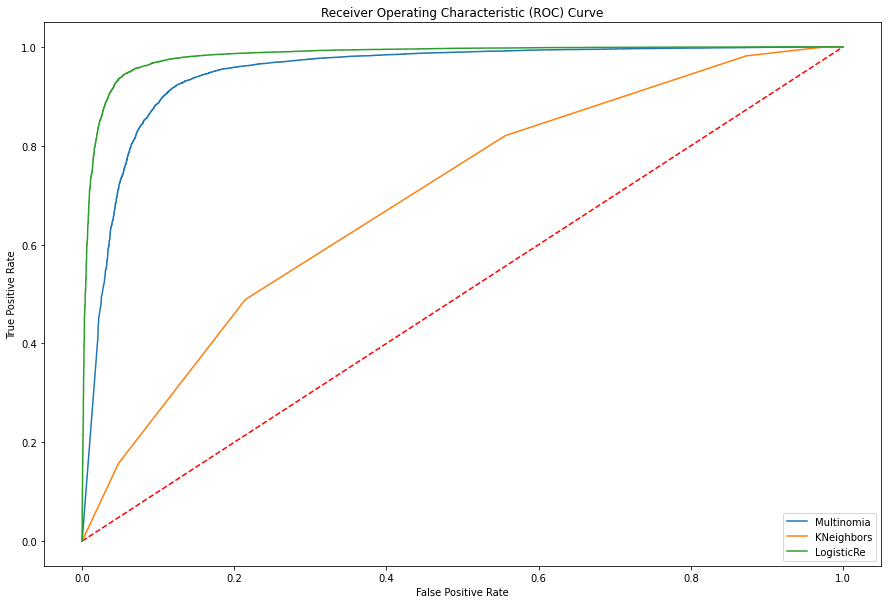

In [99]:
fpr_list=[]
tpr_list=[]

for i in range(0, len(modelos)):
    modelo=modelos[i]
    
    
    modelo.fit(x_under, y_under)
    probs = modelo.predict_proba(x_test)
    probs = probs[:,1]
    fpr, tpr, umbral = roc_curve(y_test, probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    print('\n \033[1m', str(modelo)[:15], '  \033[0;0m \n')
    print(roc_auc_score(y_test, probs))
plot_roc_curve_2(fpr_list, tpr_list)
    

#### Let's try the classifiers with some 'handmade' reviews

In [100]:
test = ['Very good','AWFUL', 'Ordinary','the food was ok but the toilets were very dirty','the attention of the staff was very kind',
        "the place is nice, but 40 minutes wait and the cold food doesn't make me want to go back"
]
#The list should be classified as: 
# [0] = 1
# [1] = 0
# [2] = 0
# [3] = 1
# [4] = 0 

In [102]:
test_vect = vectorizer.transform(test)

In [104]:
print(f"Test predictions Naive Bayes: {nb.predict(test_vect)}")
print(f"Test predictions K- Neighbors: {knn.predict(test_vect)}")
print(f"Test predictions Logistic regression: {model.predict(test_vect)}")

Test predictions Naive Bayes: [1 0 1 0 1 0]
Test predictions K- Neighbors: [1 0 0 1 1 0]
Test predictions Logistic regression: [1 0 1 0 1 0]
